In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils.intrinsic_dimension import id_correlation, estimate_id
from utils.functional import Distance_Correlation
from sklearn.feature_selection import mutual_info_classif
import scipy.stats
import seaborn as sns


In [2]:
def linear_correlation(X, Y):
    return np.corrcoef(X, Y, rowvar=False)[0,1]


In [3]:
def compute_id(array):
    data = Data(array, maxk=3)
    id=data.compute_id_2NN()[0]
    #pca=skdim.id.TwoNN()
    #id=pca.fit(array).dimension_
    return id

def id_correlation(X,Y):
    noshuffle=compute_id(np.concatenate([X,Y], axis=1))
    shuffle=[]
    print("No shuffle: ", noshuffle)
    for _ in range(1000):
        full_data=np.concatenate([np.random.permutation(X), Y], axis=1)
        shuffle.append(compute_id(full_data))
    shuffle=np.array(shuffle)
    zscore=(noshuffle-np.mean(shuffle))/np.std(shuffle)
    print("Mean with shuffle: ", np.mean(shuffle))
    print("Std with shuffle: ", np.std(shuffle))
    #print("Zscore: ", zscore)
    oneminusp=2*scipy.stats.norm.cdf(-abs(zscore))
    #print("Probability of correlation: ", oneminusp)
    return oneminusp, noshuffle, shuffle

In [4]:
theta=np.random.uniform(0, 10*np.pi, (10000,1))
r=theta/(10*np.pi)

linear_X=np.random.uniform(-1, 1, (10000,1))+0*np.random.normal(0, 0.01, (10000,1))
linear_Y=linear_X+0*np.random.normal(0, 0.01, (10000,1))
spiral_X=r*np.cos(theta)+0*np.random.normal(0, 0.01, (10000,1))
spiral_Y=r*np.sin(theta)+0*np.random.normal(0, 0.01, (10000,1))
random_X=np.random.normal(0, 1, (10000,1))
random_Y=np.random.normal(0, 1, (10000,1))

In [8]:
print(linear_correlation(linear_X, linear_Y))
print(distance_correlation(linear_X, linear_Y))
print(id_correlation(linear_X, linear_Y))

1.0
0.999999999999999
No shuffle:  1.0036960189994035
Mean with shuffle:  1.9937404738008428
Std with shuffle:  0.02661341153656737
(1.0, 1.0036960189994035, array([1.96, 2.  , 1.95, 2.  , 2.02, 1.97, 1.98, 1.99, 1.97, 2.01, 2.03,
       2.01, 2.  , 2.02, 1.98, 2.  , 2.01, 2.01, 1.97, 2.  , 2.05, 1.99,
       2.  , 1.98, 1.99, 2.03, 2.  , 1.99, 2.01, 2.  , 1.98, 2.02, 2.  ,
       1.96, 1.99, 1.98, 2.01, 2.  , 1.98, 2.02, 1.99, 1.99, 1.99, 1.94,
       2.  , 1.96, 1.99, 1.97, 2.  , 1.98, 2.  , 1.97, 2.  , 1.96, 2.  ,
       2.01, 1.98, 1.98, 1.97, 1.99, 2.05, 1.94, 1.99, 2.02, 1.99, 2.04,
       1.98, 1.96, 2.01, 2.  , 1.99, 1.96, 1.99, 2.03, 2.01, 1.94, 1.94,
       2.  , 2.03, 1.97, 2.05, 2.  , 2.02, 1.97, 1.96, 1.98, 2.  , 2.02,
       2.02, 1.98, 1.96, 1.98, 1.98, 2.01, 1.98, 2.01, 1.99, 2.04, 2.02,
       1.97, 1.97, 2.  , 2.03, 1.99, 1.99, 1.98, 1.99, 1.99, 2.03, 1.99,
       2.02, 2.01, 1.98, 2.  , 2.02, 1.99, 1.93, 2.  , 1.95, 1.97, 1.95,
       1.98, 2.01, 1.96, 2.  , 2.01, 1.

In [5]:
print(linear_correlation(spiral_X, spiral_Y))
print(distance_correlation(spiral_X, spiral_Y))
p,no,shu=id_correlation(spiral_X, spiral_Y)

-0.04936569175865177
0.088653371827173
No shuffle:  0.9940193737925823
Mean with shuffle:  1.9436725901264604
Std with shuffle:  0.025797873008562087


In [6]:
print(p)

1.217730006343801e-296


In [144]:
print(no-np.mean(shu))/np.std(shu)

-74.51095119888352


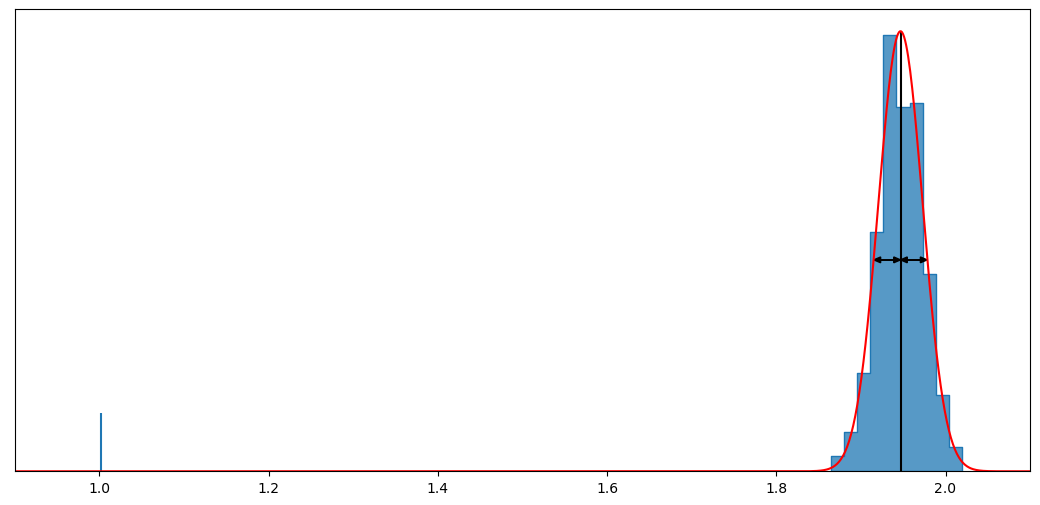

In [10]:
plt.figure(figsize=(13.1, 6))
#plt.xlabel('$I_d$', fontsize=24)
plt.yticks([])
sns.histplot(shu, bins=10, stat='density', element="step")
x = np.linspace(0.9, 2.1, 1000)
gaussian=scipy.stats.norm.pdf(x, np.mean(shu), np.std(shu))
plt.arrow(np.mean(shu), 7.30, 1.2*np.std(shu), 0, fc="k", ec="k", length_includes_head=True, head_width=0.2, head_length=0.008)
plt.arrow(np.mean(shu)+np.std(shu), 7.30, -np.std(shu), 0, fc="k", ec="k", length_includes_head=True, head_width=0.2, head_length=0.008)
plt.arrow(np.mean(shu), 7.30, -1.2*np.std(shu), 0, fc="k", ec="k", length_includes_head=True, head_width=0.2, head_length=0.008)
plt.arrow(np.mean(shu)-np.std(shu), 7.30, np.std(shu), 0, fc="k", ec="k", length_includes_head=True, head_width=0.2, head_length=0.008)
plt.vlines(no, ymin=0, ymax=np.max(shu))
plt.vlines(np.mean(shu), ymin=0, ymax=np.max(gaussian), color='k')
plt.plot(x, gaussian, c='r')
plt.xlim(0.9, 2.1)
plt.savefig('id.png')

In [86]:
print(np.mean(shu)+np.std(shu))
np.set_printoptions(precision=4)
print(x[np.where(np.logical_and((x>1.969), (x<1.97)))[0]])

1.9695033899278185
[1.9691]


In [87]:
print(gaussian[np.where(np.logical_and((x>1.969), (x<1.97)))[0]])

[9.3064]


In [473]:
print(linear_correlation(random_X, random_Y))
print(distance_correlation(random_X, random_Y))
print(id_correlation(random_X, random_Y))

0.0037480599240759193
0.015555474974324109
0.8353960247396565


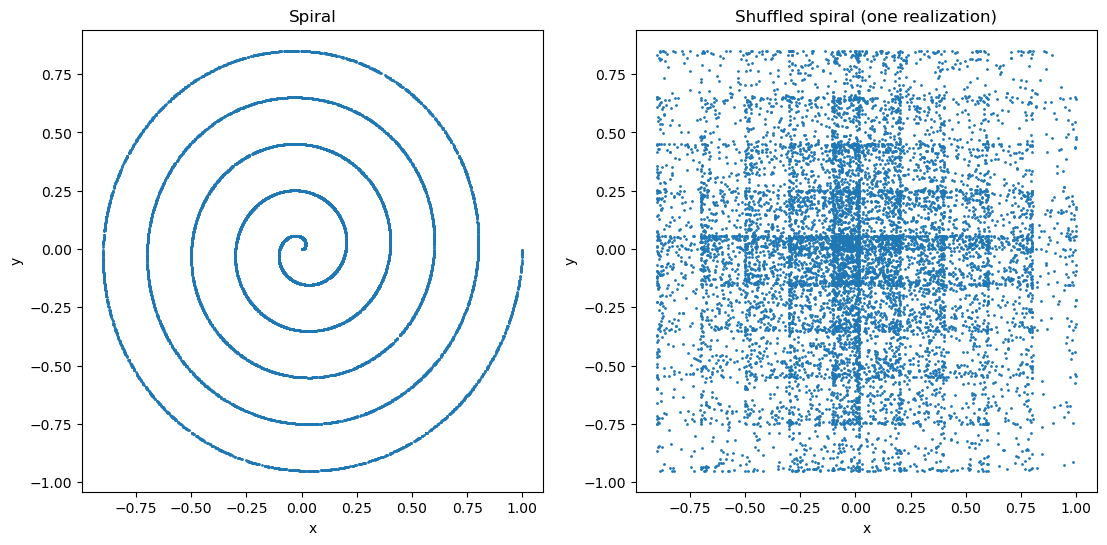

In [148]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.1, 6))
#fig.set_size_inches(1, 6)
ax1.scatter(spiral_X[:,0],spiral_Y[:,0],s=1)
ax2.scatter(np.random.permutation(spiral_X[:,0]),spiral_Y[:,0],s=1)
ax1.set_title('Spiral')
ax2.set_title('Shuffled spiral (one realization)')
ax1.set(xlabel='x', ylabel='y')
ax2.set(xlabel='x', ylabel='y')
fig.savefig('figure3.png', dpi=100)

"\n\n\nfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.1, 6))\nsns.jointplot(np.concatenate((spiral_X, spiral_Y),axis=1))\n#fig.set_size_inches(1, 6)\nax1.scatter(spiral_X[:,0],spiral_Y[:,0],s=1)\nax2.scatter(np.random.permutation(spiral_X[:,0]),spiral_Y[:,0],s=1)\nax1.set_title('Spiral')\nax2.set_title('Shuffled spiral (one realization)')\nax1.set(xlabel='x', ylabel='y')\nax2.set(xlabel='x', ylabel='y')\nfig.savefig('figure3.png', dpi=100)\n"

<Figure size 1310x600 with 0 Axes>

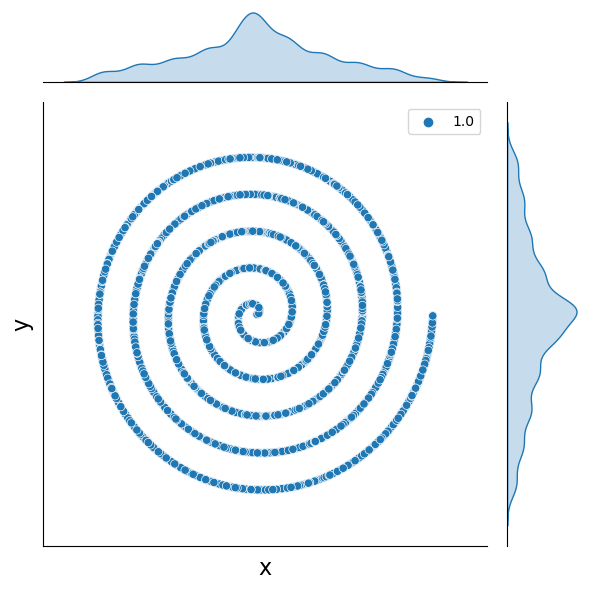

In [7]:
plt.figure(figsize=(13.1, 6))
data=np.concatenate((spiral_X, spiral_Y),axis=1)
#joint_kws= dict(s=15),marginal_kws=dict(element='step',bins=10, fill=True, legend=True),
h=sns.jointplot(x=spiral_X.reshape(-1), y=spiral_Y.reshape(-1),  hue=np.ones_like(spiral_X.reshape(-1)))
#h=sns.jointplot(np.random.permutation(spiral_X).reshape(-1), spiral_Y.reshape(-1), joint_kws= dict(s=15),marginal_kws=dict(element='step',bins=10, fill=True, legend=True))
#plt.suptitle("Your title here")

# JointGrid has a convenience function
h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.ax_joint.set_xlabel('x')
h.ax_joint.set_ylabel('y')
h.ax_joint.set_xticks([])
h.ax_joint.set_yticks([])

# also possible to manipulate the histogram plots this way, e.g.
#h.plot_marginals(sns.histplot, kde=True)

# labels appear outside of plot area, so auto-adjust
h.figure.tight_layout() 
plt.savefig('joint_spiral.png')
#sns.jointplot(np.random.permutation(spiral_X).reshape(-1), spiral_Y.reshape(-1))


'''


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.1, 6))
sns.jointplot(np.concatenate((spiral_X, spiral_Y),axis=1))
#fig.set_size_inches(1, 6)
ax1.scatter(spiral_X[:,0],spiral_Y[:,0],s=1)
ax2.scatter(np.random.permutation(spiral_X[:,0]),spiral_Y[:,0],s=1)
ax1.set_title('Spiral')
ax2.set_title('Shuffled spiral (one realization)')
ax1.set(xlabel='x', ylabel='y')
ax2.set(xlabel='x', ylabel='y')
fig.savefig('figure3.png', dpi=100)
'''

In [13]:
np.save('Y.npy', spiral_Y)

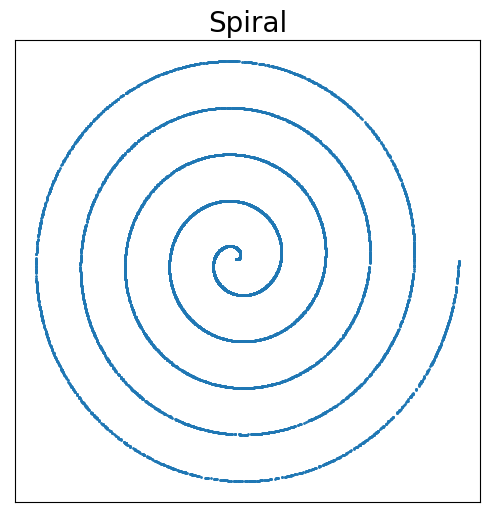

In [81]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.1, 6))
#fig.set_size_inches(1, 6)
plt.figure(figsize=(6,6))
plt.scatter(spiral_X[:,0],spiral_Y[:,0],s=1)
#ax2.scatter(np.random.permutation(spiral_X[:,0]),spiral_Y[:,0],s=1)
#plt.title('Spiral', fontsize=20)
plt.title('Spiral', fontsize=20)
plt.xticks([])
plt.yticks([])
#ax2.set_title('Shuffled spiral (one realization)')
#ax1.set(xlabel='x', ylabel='y')
#ax2.set(xlabel='x', ylabel='y')
plt.savefig('spiral.png', dpi=100)

In [394]:
for ro in np.arange(11)*0.1:
    prob=[]
    for _ in range(20):
        gaussian_data=np.random.default_rng().multivariate_normal(np.zeros(2),np.array([[1,ro],[ro,1]]), (10000))
        #plt.scatter(gaussian_data[:,0], gaussian_data[:,1])
        prob.append(id_correlation(gaussian_data[:,0].reshape(-1,1), gaussian_data[:,1].reshape(-1,1)))
    prob=np.array(prob)
    print(np.mean(prob))

0.4422834017142524
0.46965978399893854
0.4585565289059229
0.49939448927856767
0.5430043260641577
0.5740067795196466
0.5036620015762767
0.5202670926414978
0.4523696019779629
0.6970137037096832
1.0


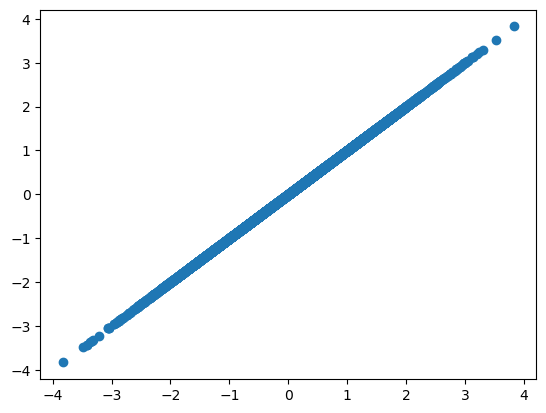

In [351]:
plt.scatter(gaussian_data[:,0], gaussian_data[:,1])

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
#from dadapy.data import Data
from scipy.spatial import distance

In [2]:
angles=np.random.uniform(low=0.0,high=3.1415926,size=(5000))

In [3]:
angles=angles*4.
a=1.0
x=a*angles*np.cos(angles)
y=a*angles*np.sin(angles)
y_orig=np.copy(y)

In [4]:
#x=np.load("X.npy")
#y=np.load("Y.npy")
xy=np.zeros([x.shape[0],2])
xy[:,0]=x
xy[:,1]=y
m1=xy[:,0]
m2=xy[:,1]
xmin = m1.min()-0.05*(m1.max()-m1.min())
xmax = m1.max()+0.05*(m1.max()-m1.min())
ymin = m2.min()-0.05*(m2.max()-m2.min())
ymax = m2.max()+0.05*(m2.max()-m2.min())
#fig, ax = plt.subplots()
#ax.plot(m1, m2, 'k.', markersize=0.2)
#ax.set_xlim([xmin, xmax])
#ax.set_ylim([ymin, ymax])
#plt.show()

In [7]:
np.random.shuffle(y)
xy=np.zeros([x.shape[0],2])
xy[:,0]=x
xy[:,1]=y
m1=xy[:,0]
m2=xy[:,1]
xmin = m1.min()-0.05*(m1.max()-m1.min())
xmax = m1.max()+0.05*(m1.max()-m1.min())
ymin = m2.min()-0.05*(m2.max()-m2.min())
ymax = m2.max()+0.05*(m2.max()-m2.min())

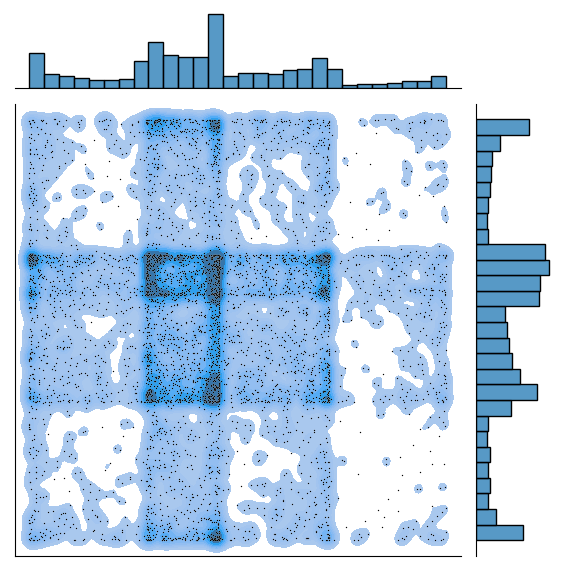

In [8]:
lab_=np.zeros(xy.shape[0],dtype='int')
#g=sns.jointplot(data=xy, x=xy[:,0], y=xy[:,1], s=1, kind='kde', palette='Blues', shade=True)#,scatter_kws={'s': 1})
g=sns.jointplot(data=xy, x=xy[:,0], y=xy[:,1], s=1, color='k', kind='scatter', marginal_kws={'color': '#1f77b4'})#,scatter_kws={'s': 1})
g.plot_joint(sns.kdeplot, zorder=0, levels=10,bw_adjust=0.2, fill=True)#
g.ax_joint.set_xticks([])
g.ax_joint.set_yticks([])
plt.savefig('shuff.png', dpi=100)